## Exam

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

#### 1. 다음과 같은 어레이를 Numpy를 이용하여 만드시오.

1)

In [3]:
np.arange(0, 5, 0.5, float)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

2)

In [6]:
np.arange(1, 11, dtype=np.int).reshape(-1,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

3)

In [8]:
np.identity(3, dtype=np.int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

4)

In [364]:
np.ones((4, 4), dtype=np.int)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

5)

In [12]:
np.arange(1, 24, 2, dtype=np.int).reshape(-1,4)

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

#### 2. 다음과 같은 데이터프레임을 만드시오.

In [366]:
data = {
    '지역': ['수도권', '경상권', '수도권', '경상권'],
    '2015': [9904312, 3448737, 2890451, 2466052],
    '2010': [9631482, 3393191, 2632035, 2431774],
    '2005': [9762546, 3512547, 2517680, 2456016],
    '2000': [9853972, 3655437, 2466338, 2473990]
}
index = ['서울', '부산', '인천', '대구']
columns = ['지역', '2015', '2010', '2005', '2000']

df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2015,2010,2005,2000
서울,수도권,9904312,9631482,9762546,9853972
부산,경상권,3448737,3393191,3512547,3655437
인천,수도권,2890451,2632035,2517680,2466338
대구,경상권,2466052,2431774,2456016,2473990


In [367]:
df['2010-2015 증가율'] = round((df['2015'] - df['2010']) / df['2010'], 4)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0164
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


#### 3. 타이타닉호 승객에 대해서 다음을 구하시오.

In [4]:
titanic = sns.load_dataset('titanic')

In [30]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1) 성별(sex) 인원수, 선실별(class) 인원수, 사망/생존(alive) 인원수를 구하시오.

In [37]:
titanic.groupby('sex').size()

sex
female    314
male      577
dtype: int64

In [34]:
titanic.groupby('class').size()

class
First     216
Second    184
Third     491
dtype: int64

In [35]:
titanic.groupby('alive').size()

alive
no     549
yes    342
dtype: int64

2) '미성년자', '청년', '중년', '장년', '노년' 승객의 비율을 구하시오. <br>
    단, 나이의 기준은 [1, 15, 30, 45, 60, 90] 임.

In [39]:
bins = [1, 15, 30, 45, 60, 90]
labels = ['미성년자', '청년', '중년', '장년', '노년']
titanic['age_group'] = pd.cut(titanic.age, bins, labels=labels)

In [47]:
round(titanic.groupby('age_group').size() / titanic.age_group.count(), 2)

age_group
미성년자    0.10
청년      0.47
중년      0.29
장년      0.12
노년      0.03
dtype: float64

#### 4. 팁 데이터에 대해서 다음을 구하시오.

In [51]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1) 팁의 비율(단위 %)을 소숫점 2째자리까지 구하시오.

In [56]:
tips['tip_pct'] = round(tips['tip'] / tips['total_bill'], 2)
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3,0.20
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.07
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.09
242,17.82,1.75,Male,No,Sat,Dinner,2,0.10
243,18.78,3.00,Female,No,Thur,Dinner,2,0.16


2) 팁의 비율이 가장 높은 날은 목, 금, 토, 일요일 중 어떤 날인지 피봇 테이블을 이용하여 구하시오.

In [81]:
day_tip = tips.pivot_table('tip_pct', 'day')
day_tip[day_tip.values == day_tip.values.max()]

,tip_pct
day,
Fri,0.169474


#### 5. 다음의 지시대로 SQLite3를 이용하는 파이썬 프로그램을 작성하시오.

In [3]:
conn = sqlite3.connect('./test.db') # 파일 DB 접속(일회성)

1) 필드로 [백넘버(PK), 이름, 포지션]을 갖는 테이블 Eagles를 생성

In [5]:
cur = conn.cursor()
cur.execute('CREATE TABLE IF NOT EXISTS Eagles \
            (back_no INT NOT NULL, \
             name TEXT, \
             position TEXT, \
             PRIMARY KEY(back_no));')

conn.commit()

2) 1)번에서 만든 테이블에 (8, 정근우, 내야수)를 포함하여 임의로 5명의 선수를 삽입

In [7]:
players = ((8, '정근우', '내야수'), (22, '이태양', '투수'), (13, '최재훈', '포수'),
          (19, '신은총', '외야수'), (4, '박진원', '투수'))

cur = conn.cursor()
sql = 'INSERT INTO Eagles VALUES (?, ?, ?);'
cur.executemany(sql, players)

conn.commit()

3) 2)번에서 입력한 5명의 선수 모두를 보여주는 프로그램

In [9]:
cur = conn.cursor()
cur.execute('SELECT * FROM Eagles')
cur.fetchall()

[(8, '정근우', '내야수'),
 (22, '이태양', '투수'),
 (13, '최재훈', '포수'),
 (19, '신은총', '외야수'),
 (4, '박진원', '투수')]

4) 정근우 선수의 포지션을 외야수로 변경

In [11]:
position = "외야수"
back_no = 8
cur.execute("UPDATE Eagles SET position=? WHERE back_no=?;", (position, back_no))
conn.commit()

5) 5명의 선수중 백넘버가 가장 큰 선수를 삭제

In [27]:
cur = conn.cursor()
cur.execute('SELECT max(back_no) FROM Eagles')
back_no = cur.fetchone()
back_no

(22,)

In [28]:
cur = conn.cursor()
cur.execute("DELETE FROM Eagles WHERE back_no=?;", (back_no))
conn.commit()

#### 6. 시그모이드 함수 (sigmoid(x) = 1 / (1 + np.exp(-x)))와 시그모이드 함수를 미분한 함수 (sigmoid(x) * (1 - sigmoid(x))의 그래프를 그리시오.
#### (단, x의 범위는 -3에서 +3까지)

In [41]:
x = np.arange(-3, 3, 0.01)
sigmoid = 1 / (1 + np.exp(-x))
p_sigmoid = sigmoid * (1 - sigmoid)

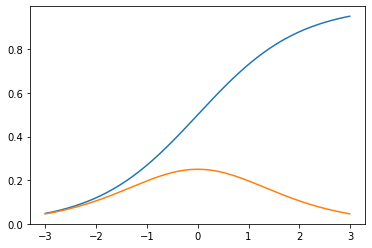

In [46]:
plt.plot(x, sigmoid)
plt.plot(x, p_sigmoid)
plt.show()

#### 7. 다음 빈 칸에 들어갈 말은?

1) 밥그릇 모양의 그래프에서 경사도를 따라 움직이면서 기울기가 0이 되는 지점을 찾는 것을 (_____)이라 한다.

In [47]:
"Answer: 경사하강법"

'Answer: 경사하강법'

2) 1)에서 이동 거리를 정해 주는 것은 (_____) 이다.

In [48]:
"Answer: Learning rate"

'Answer: Learning rate'

3) 인공지능에서 신경망을 이루는 가장 중요한 기본 단위는 (______)이다.

In [51]:
"Answer: 퍼셉트론"

'Answer: 퍼셉트론'

4) 활성화 함수로서 x가 음수일 경우에는 0, x가 0 이상일 때는 x값을 갖는 함수는 (____)이다.

In [52]:
"Answer: Relu"

'Answer: Relu'

5) 딥 러닝에서 입력층과 출력층 사이의 층을 (_____)이라 한다.

In [53]:
"Answer: 은닉층"

'Answer: 은닉층'

#### 8. 아이리스 데이터 셋을 이용하여 다음을 구하는 프로그램을 작성하시오.

- 아이리스 데이터의 4가지 속성(꽃받침 길이/폭, 꽃잎 길이/폭)을 이용하여 품종을 예측
- 단, 정확도는 98% 이상일 것

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

iris = sns.load_dataset('iris')

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
sample = iris.sample(frac=1)
dataset = sample.values

X = dataset[:,0:4]
Y = dataset[:,4]

In [28]:
e = LabelEncoder()
Y_label = e.fit_transform(Y)

Y_encoded = np_utils.to_categorical(Y_label)

# Train set, Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.3)

In [30]:
y_train.shape

(105, 3)

In [55]:
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

#모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
model.fit(X_train, y_train, epochs=200, batch_size=20)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_train, y_train)[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_53 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_54 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_55 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_56 (Dense)             (None, 3)                 99        
Total params: 104,195
Trainable params: 104,195
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
105/105 [==============================] - 1s 5ms/step - loss: 0.9555 - acc: 0.4857
Epoch 2/200
105/105 [===================

Epoch 155/200
105/105 [==============================] - 0s 114us/step - loss: 0.0719 - acc: 0.9619
Epoch 156/200
105/105 [==============================] - 0s 114us/step - loss: 0.0814 - acc: 0.9619
Epoch 157/200
105/105 [==============================] - 0s 105us/step - loss: 0.0707 - acc: 0.9810
Epoch 158/200
105/105 [==============================] - 0s 114us/step - loss: 0.0682 - acc: 0.9810
Epoch 159/200
105/105 [==============================] - 0s 95us/step - loss: 0.0696 - acc: 0.9714
Epoch 160/200
105/105 [==============================] - 0s 95us/step - loss: 0.0642 - acc: 0.9810
Epoch 161/200
105/105 [==============================] - 0s 105us/step - loss: 0.0597 - acc: 0.9810
Epoch 162/200
105/105 [==============================] - 0s 124us/step - loss: 0.0804 - acc: 0.9714
Epoch 163/200
105/105 [==============================] - 0s 124us/step - loss: 0.0575 - acc: 0.9810
Epoch 164/200
105/105 [==============================] - 0s 105us/step - loss: 0.0728 - acc: 0.9714
Ep

In [56]:
loss, acc = model.evaluate(X_test, y_test)
print('[ loss: %.4f, acc: %.4f ]' % (loss, acc))

45/45 [==============================] - 0s 413us/step
[ loss: 0.0268, acc: 1.0000 ]


In [79]:
n = np.random.randint(0, len(X_test))

predictions = model.predict(X_test[n].reshape(1,4))
print("[Idx:%d] [%d, %d]" % (n, np.argmax(predictions), list(y_test[n]).index(1.0)))

[Idx:21] [1, 1]


#### 9. 피마 인디언 데이터 셋을 이용하여 다음을 구하는 프로그램을 작성하시오.

- 피마 인디언 데이터의 8가지 속성을 이용하여 당뇨병 여부를 판단할 것
- 단, 데이터의 25% 테스트 데이터로 사용하여 정확도를 구할 것

In [80]:
path = r'D:\workspace-Jwp\python\Data_Science\deeplearning\deeplearning\dataset\pima-indians-diabetes.csv'

In [369]:
pima = pd.read_csv(path, header=None)
pima.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [370]:
sample = pima.sample(frac=1)
dataset = sample.values

X = dataset[:,0:8]
Y = dataset[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [382]:
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
model.fit(X_train, y_train, epochs=200, batch_size=10)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_train, y_train)[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_239 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_240 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_241 (Dense)            (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
576/576 [==============================] - 2s 4ms/step - loss: 3.7459 - acc: 0.6389
Epoch 2/200
576/576 [==============================] - 0s 130us/step - loss: 2.9560 - acc: 0.5851
Epoch 3/200
576/576 [==============================] - 0s 148us/step - loss: 2.3541 - acc: 0.5434
Epoch 4/200
576/576 [==============================] - 0s 139us/step - loss: 1.1341 - acc: 0.5556
Epoch 5/200
576/57

576/576 [==============================] - 0s 139us/step - loss: 0.5588 - acc: 0.7135
Epoch 77/200
576/576 [==============================] - 0s 144us/step - loss: 0.5670 - acc: 0.7101
Epoch 78/200
576/576 [==============================] - 0s 135us/step - loss: 0.5468 - acc: 0.7066
Epoch 79/200
576/576 [==============================] - 0s 134us/step - loss: 0.5644 - acc: 0.6997
Epoch 80/200
576/576 [==============================] - 0s 135us/step - loss: 0.5587 - acc: 0.6997
Epoch 81/200
576/576 [==============================] - 0s 135us/step - loss: 0.5500 - acc: 0.7066
Epoch 82/200
576/576 [==============================] - 0s 137us/step - loss: 0.5531 - acc: 0.7101
Epoch 83/200
576/576 [==============================] - 0s 141us/step - loss: 0.5453 - acc: 0.7240
Epoch 84/200
576/576 [==============================] - 0s 134us/step - loss: 0.5594 - acc: 0.6962
Epoch 85/200
576/576 [==============================] - 0s 141us/step - loss: 0.5497 - acc: 0.7274
Epoch 86/200
576/576 [=

576/576 [==============================] - 0s 142us/step - loss: 0.5166 - acc: 0.7240
Epoch 159/200
576/576 [==============================] - 0s 146us/step - loss: 0.5073 - acc: 0.7309
Epoch 160/200
576/576 [==============================] - 0s 144us/step - loss: 0.4949 - acc: 0.7378
Epoch 161/200
576/576 [==============================] - 0s 141us/step - loss: 0.5384 - acc: 0.7222
Epoch 162/200
576/576 [==============================] - 0s 144us/step - loss: 0.5111 - acc: 0.7465
Epoch 163/200
576/576 [==============================] - 0s 146us/step - loss: 0.5038 - acc: 0.7378
Epoch 164/200
576/576 [==============================] - 0s 141us/step - loss: 0.5026 - acc: 0.7483
Epoch 165/200
576/576 [==============================] - 0s 149us/step - loss: 0.5163 - acc: 0.7483
Epoch 166/200
576/576 [==============================] - 0s 135us/step - loss: 0.5287 - acc: 0.7465
Epoch 167/200
576/576 [==============================] - 0s 141us/step - loss: 0.4968 - acc: 0.7361
Epoch 168/200


In [383]:
loss, acc = model.evaluate(X_test, y_test)
print('[ loss: %.4f, acc: %.4f ]' % (loss, acc))

192/192 [==============================] - 0s 81us/step
[ loss: 0.6760, acc: 0.7292 ]


In [360]:
n = np.random.randint(0, len(X_test))

predictions = model.predict(X_test[n].reshape(1,8))
print("[Idx:%d] [%d, %d]" % (n, (predictions+0.1).round(), y_test[n]))

[Idx:24] [0, 1]


#### 10. 과제 점수